## 2.4 Método de Newton-Raphson

Sabemos que muitos problemas em ciências e engenharia envolvem a resolução de uma equação que pode ser colocada na forma 

$$f(x)=0$$

Sabemos também que, em muitos casos, a solução exata $\overline{x}$ só pode ser encontrada por processos numéricos. Uma solução numérica é geralmente obtida por meio de um processo iterativo que gera uma sequência de soluções aproximadas, que converge para a solução exata, a partir de uma aproximação inicial $x_0$. 

O _Método de Newton_  (_Newton-Raphson_ ou _método das tangentes_) para zeros de funções reais em uma variável pode ser deduzido a partir do método do ponto fixo, ao buscar uma função de interação $\phi(x)$ tal que $|\phi'(x)|<1$. Dessa forma, escolhendo uma "boa" aproximação inicial $x_0$, garantimos que a sequência de soluções aproximadas irá convergir para a solução exata $\overline{x}$.

Para isso, estabelecemos que $|\phi'(\overline{x})|=0$, assim, espera-se que em torno de $\overline{x}$ tenhamos $|\phi'(x)|<1$. Para encontrar a função de iteração $\phi(x)$ que satisfaça essas condições, começamos multiplicando $f(x)=0$ por uma função desconhecida $\theta(x)$ e somamos $x$ em ambos os lados da equação obtendo

$$x = x+\theta(x)f(x)$$ 
 
 ou
 
$$\phi(x) = x+\theta(x)f(x)$$ 

nas quais $\theta(x)$ é uma função de $x$ tal que $\theta(\overline{x})\neq 0$. Então, para o ponto fixo $x=\overline{x}$ tem-se $\phi(\overline{x}) = \overline{x}$. 

Derivando a função $\phi(x)$ e avaliando no ponto fixo obtemos:
$$\phi'(x) = 1+\theta'(x)f(x) + \theta(x)f'(x)$$

avaliando em $\overline{x}$ (lembrando que $f(\overline{x})=0$ e $\theta'(\overline{x})=0$), obtemos:

$$\phi'(\overline{x}) = 1+\theta'(\overline{x})f(\overline{x}) + \theta(\overline{x})f'(\overline{x})$$

$$ 0 = 1 + \theta(\overline{x})f'(\overline{x}) $$

então
$$  \theta(\overline{x}) = -\frac{1}{f'(\overline{x})} $$

Assim, escolhento $\theta(x) = -\frac{1}{f'(x)}$ e substituindo em $\phi(x) = x+\theta(x)f(x)$ obtemos a função de iteração
$$ \phi(x) = x - \frac{f(x)}{f'(x)}$$

que fornece o processo iterativo do **método de Newton-Raphson** :
$$ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

a partir de uma aproximação inicial $x_0$,  para $i=1,2,3,...$.

<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/2_ZEROS_DE_FUNCOES/imagens/newton.png" width="500">



<p style="text-align:center"> Figura 2.4.1 - Interpretação geométrica do método de Newton </p>

Vejamos agora alguns exemplos. Iniciamos importando as bibliotecas `numpy`e `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exemplo 2.4.1:**
Encontre a raiz de $f(x)=ln(x)+x-4$

Para obter uma aproximação inicial podemos usar um plot minimalista,fazendo.

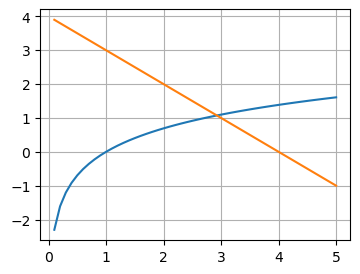

In [2]:
xi = np.linspace(0.1, 5)
plt.figure(figsize=(4,3))
plt.plot(xi, np.log(xi), xi, 4-xi) 
plt.grid()
plt.show()

O gráfico mostra que existe uma raiz entre 2 e 3, então, iniciando com $x_0=2$ obtemos pelo método de Newton:

$x_1 = x_0-\frac{f(x_0)}{f'(x_0)}=2-\frac{ln(2) +2 -4}{1/2+1}=2.871235$

$x_2 = x_1-\frac{f(x_1)}{f'(x_1)}=2-\frac{ln(2.871235) +2.871235-4}{1/2.871235+1}=2.926137$

$x_3 = x_2-\frac{f(x_2)}{f'(x_2)}=2.926137-\frac{ln(2.926137) +2.926137 -4}{1/2.926137+1}=2.926271$

Assim, em três interações chega-se a uma solução com $E=0.000046$. Usando Python podemos chegar a esses resultados com o código mostrado abaixo:

In [3]:
f = lambda x: np.log(x)+x-4.0
df = lambda x: 1./x +1  
x = 2
x_ant = x
err = 10.0

while err>0.0001:
    x = x - f(x)/df(x)
    err = abs(x-x_ant)/abs(x)
    x_ant = x
    print ("| x=%.6f"%x, "| err=%.6f"%err)

| x=2.871235 | err=0.303436
| x=2.926137 | err=0.018762
| x=2.926271 | err=0.000046


Fazendo o gráfico apenas para conferir

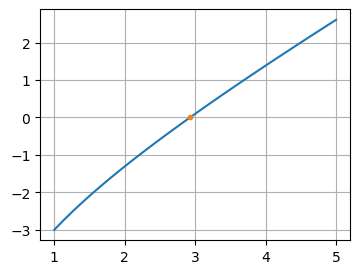

In [4]:
f = lambda x: np.log(x)+x-4.0
xi = np.linspace(1, 5, 31)
plt.figure(figsize=(4,3))
plt.plot(xi, f(xi), "-") 
plt.plot(x, f(x), ".") 
plt.grid()
plt.show()

Use o exemplo 2.4.1 como modelo para resolver o Exercício 1 no final da seção.

### O método de Newton e a série te Taylor

O método de Newton também pode ser deduzido a partir do polinômio de Taylor em torno de $x_0$:

$$f(x) = f(x_0)+
        f^{(1)}(x_0)(x-x_0)+ 
        f^{(2)}(x_0)\frac{(x-x_0)^2}{2!}+
        f^{(3)}(x_0)\frac{(x-x_0)^3}{3!}+...$$
        
desprezando os termos de maior grau, os quais assumem valores muito pequenos para $x$ suficientemente próximo de $x_0$, obtemos a seguinte aproximação para $f(x)$:

$$f(x) \approx f(x_0)+f'(x_0)(x-x_0)$$

fazendo $x=\overline{x}$, como $f(\overline{x})=0$, tem-se:

$$0 \approx f(x_0)+f'(x_0)(\overline{x}-x_0)$$

ou

$$\overline{x} \approx x_0 - \frac{f(x_0)}{f'(x_0)}$$

que fornece o processo iterativo 

$$ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} \,,\,\,\,\,\, i=1,2,...$$

Dizemos que um método iterativo apresenta convergência quadrática se

$$
\lim _{i \rightarrow \infty} \frac{e_{i+1}}{e_i^2}=k
$$

em que $k$ é chamada constante assintótica de proporcionalidade, $e_i=\left|x_i-\bar{x}\right|$ e $e_{i+1}=\left|x_{i+1}-\bar{x}\right|$ são os erros cometidos nas iterações correspondentes.

O método de Newton apresenta convergência quadrática, se $f^{\prime}(\bar{x}) \neq 0$.

**Exemplo 2.4.2:** Usando o método de Newton, resolva a equação $2x-e^{-2x}=0$, com $\epsilon = 0.0001$.


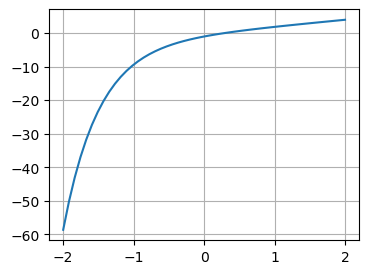

In [5]:
f = lambda x: 2*x-np.exp(-2*x)

xi = np.linspace(-2, 2)
plt.figure(figsize=(4,3))
plt.plot(xi, f(xi)) 
plt.grid()
plt.show()

Pelo gráfico podemos deduzir que a raiz está entre $0$ e $1$, tomemos $x_0=0,5$.

In [6]:
x0 = 0.5
df = lambda x: 2+2*np.exp(-2*x)

# Inicializando as variáveis
err = 10.0
x_ant = x0
eps = 0.0001

while err>eps:
    x = x_ant-f(x_ant)/df(x_ant)    
    err = abs(x-x_ant)/x
    x_ant = x
    print ("x=%.5f, "%x, " err=%.5f"%err)

x=0.26894,   err=0.85914
x=0.28349,   err=0.05133
x=0.28357,   err=0.00028
x=0.28357,   err=0.00000


**Exercícios:**


**1.** Usando o método de Newton, resolva as equações a seguir com precisão de 5 casas decimais.

a) $f(x)=x^3+8 x^2-4 x-2=0$

b) $f(x)=2 x-e^{-x}=0$

c) $f(x)=\ln (x)-\operatorname{sen}(x)=0$


**2.** Utilize o método de Newton para encontrar soluções com precisão de $10^{-5}$ para os problemas a seguir (Fonte: [Burden et al., 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/98)):

a) $e^x+2^{-x}+2 \cos x-6=0$

b) $\ln (x-1)+\cos (x-1)=0$

c) $2 x \cos 2 x-(x-2)^2=0$

d) $(x-2)^2-\ln x=0$

e) $e^x-3 x^2=0$

f) $\operatorname{sen} x-e^{-x}=0$

g) $x^3+3 x^2-1=0$

h) $x^3-2 x^2-5=0$

i) $x-0,8-0,2 \operatorname{sen} x=0$




**3.** 
Use o método de Newton-Raphson para determinar uma raiz real de $f(x)=-1+5,5 x-4 x^2+0,5 x^3$ usando aproximações iniciais (a) 4,52 e (b) 4,54 . Discuta e use métodos gráficos e analíticos para explicar quaisquer peculiaridades nos seus resultados (Fonte: [Chapra, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/169)).

**4.** Use o método de Newton-Raphson para encontrar a raiz de

$$
f(x)=e^{-0,5 x}(4-x)-2
$$

Use aproximações iniciais de (a) 2, (b) 6 e (c) 8 . Explique seus resultados (Fonte: [Chapra, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/170))..

**5.** A função descrita por $f(x)=\ln \left(x^2+1\right)-\mathrm{e}^{0,4 x} \cos \pi x$ tem um número infinito de zeros (Fonte:[Burden et al., 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/99)).

a) Determine, com precisão de $10^{-6}$, o único zero negativo.

b) Determine, com precisão de $10^{-6}$, os quatro menores zeros positivos.

c) Determine uma aproximação inicial razoável para determinar o enésimo menor zero positivo de $f$. 

d) Utilize a parte (c) para determinar, com precisão de $10^{-6}$, o $25^{\circ}$ menor zero positivo de $f$.